# Import libraries¶

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
%matplotlib inline
sns.set()

# Import dataset¶

In [3]:
from ucimlrepo import fetch_ucirepo 
  

iris = fetch_ucirepo(id=53) 
  

X = iris.data.features 
y = iris.data.targets 
  

print(iris.metadata) 
  

print(iris.variables) 


{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Life Science', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'published_in': 'Significance, 2021', 'year': 2021, 'url': 'https://www.semanticscholar.org/paper/4599862ea877863669a6a8e63a3c707a787d5d7e', 'doi': '1740-9713.01589'},

In [4]:
iris = iris.data
iris

{'ids': None,
 'features':      sepal length  sepal width  petal length  petal width
 0             5.1          3.5           1.4          0.2
 1             4.9          3.0           1.4          0.2
 2             4.7          3.2           1.3          0.2
 3             4.6          3.1           1.5          0.2
 4             5.0          3.6           1.4          0.2
 ..            ...          ...           ...          ...
 145           6.7          3.0           5.2          2.3
 146           6.3          2.5           5.0          1.9
 147           6.5          3.0           5.2          2.0
 148           6.2          3.4           5.4          2.3
 149           5.9          3.0           5.1          1.8
 
 [150 rows x 4 columns],
 'targets':               class
 0       Iris-setosa
 1       Iris-setosa
 2       Iris-setosa
 3       Iris-setosa
 4       Iris-setosa
 ..              ...
 145  Iris-virginica
 146  Iris-virginica
 147  Iris-virginica
 148  Iris-virgini

In [5]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


# Understanding Data

In [69]:
X.head()

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [70]:
X.tail()

,sepal length,sepal width,petal length,petal width
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3
149,5.9,3.0,5.1,1.8


In [71]:
X.sample(5)

,sepal length,sepal width,petal length,petal width
127,6.1,3.0,4.9,1.8
135,7.7,3.0,6.1,2.3
58,6.6,2.9,4.6,1.3
38,4.4,3.0,1.3,0.2
40,5.0,3.5,1.3,0.3


# Exploratory Data Analysis¶

In [72]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [74]:
X.describe().round(2)

,sepal length,sepal width,petal length,petal width
count,150.00,150.00,150.00,150.00
mean,5.84,3.05,3.76,1.20
std,0.83,0.43,1.76,0.76
min,4.30,2.00,1.00,0.10
25%,5.10,2.80,1.60,0.30
50%,5.80,3.00,4.35,1.30
75%,6.40,3.30,5.10,1.80
max,7.90,4.40,6.90,2.50


In [75]:
X.columns

Index(['sepal length', 'sepal width', 'petal length', 'petal width'], dtype='object')

In [76]:
X.shape

(150, 4)

# Cleaning Data

# Dealing with Missing Data

In [7]:
X.isna().sum()

sepal length    0
sepal width     0
petal length    0
petal width     0
dtype: int64

<AxesSubplot:>

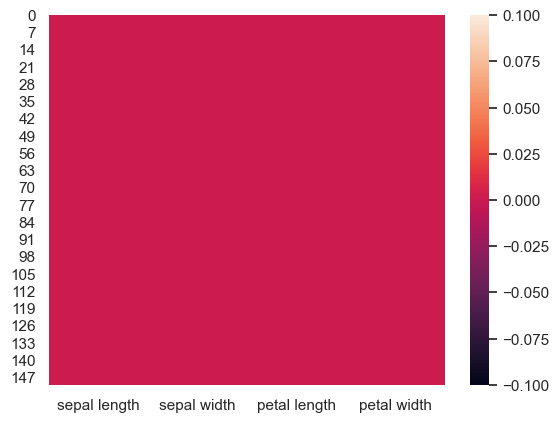

In [8]:
sns.heatmap(X.isna())

In [9]:
y.isna().sum()

class    0
dtype: int64

<AxesSubplot:>

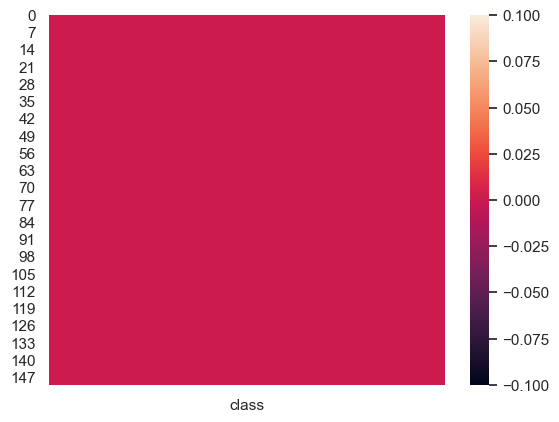

In [10]:
sns.heatmap(y.isna())

# Dealing with Dublicated Data

In [11]:
X.duplicated().sum()

3

In [12]:
X[X.duplicated()]

,sepal length,sepal width,petal length,petal width
34,4.9,3.1,1.5,0.1
37,4.9,3.1,1.5,0.1
142,5.8,2.7,5.1,1.9


In [15]:
y['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

# Spliting Data

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(120, 4)

In [21]:
y_train.shape

(120, 1)

In [22]:
X_test.shape

(30, 4)

In [24]:
y_test.shape

(30, 1)

# Modeling

# SVM

In [37]:
svc = SVC(C=.09)
svc.fit(X_train,y_train)
y_predict_svc = svc.predict(X_test)
print('accuracy_score for Support Vector =',100*accuracy_score(y_predict_svc,y_test),'%')
print('='*68)
print('confusion_matrix for Support Vector\n',confusion_matrix(y_predict_svc,y_test))
print('='*68)
print('classification_report for Support Vector\n',classification_report(y_predict_svc,y_test))

accuracy_score for Support Vector = 96.66666666666667 %
confusion_matrix for Support Vector
 [[10  0  0]
 [ 0  9  1]
 [ 0  0 10]]
classification_report for Support Vector
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# LogisticRegression

In [48]:
knn = KNeighborsClassifier(p=6)
knn.fit(X_train,y_train)
y_predict_knn = knn.predict(X_test)
print('accuracy_score for Support Vector =',100*accuracy_score(y_predict_knn,y_test),'%')
print('='*68)
print('confusion_matrix for Support Vector\n',confusion_matrix(y_predict_knn,y_test))
print('='*68)
print('classification_report for Support Vector\n',classification_report(y_predict_knn,y_test))

accuracy_score for Support Vector = 96.66666666666667 %
confusion_matrix for Support Vector
 [[10  0  0]
 [ 0  8  0]
 [ 0  1 11]]
classification_report for Support Vector
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.89      1.00      0.94         8
 Iris-virginica       1.00      0.92      0.96        12

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30



C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


# Decision Tree

In [53]:
reg = LogisticRegression(C=.01)
reg.fit(X_train,y_train)
y_predict_reg = reg.predict(X_test)
print('accuracy_score for Support Vector =',100*accuracy_score(y_predict_reg,y_test),'%')
print('='*68)
print('confusion_matrix for Support Vector\n',confusion_matrix(y_predict_reg,y_test))
print('='*68)
print('classification_report for Support Vector\n',classification_report(y_predict_reg,y_test))

accuracy_score for Support Vector = 93.33333333333333 %
confusion_matrix for Support Vector
 [[10  0  0]
 [ 0  7  0]
 [ 0  2 11]]
classification_report for Support Vector
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       0.78      1.00      0.88         7
 Iris-virginica       1.00      0.85      0.92        13

       accuracy                           0.93        30
      macro avg       0.93      0.95      0.93        30
   weighted avg       0.95      0.93      0.93        30



C:\Users\EL_Garhy\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
